# Importing libraries

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preventing warnings

In [38]:
from warnings import filterwarnings
filterwarnings('ignore')

# Importing Data

In [3]:
os.chdir('D:/Data for Project/Truck_dataset')

In [4]:
df=pd.read_csv('Truck_sales.csv')

In [5]:
df.head()

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


In [6]:
df.columns=['Month','Truks_sold']

In [7]:
df.head()

,Month,Truks_sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


In [8]:
df['year'] = df.Month.str.split('-').str.get(0)

In [9]:
df['mth'] = df.Month.str.split('-').str.get(1)

In [11]:
df['year']=df['year'].replace({'03':2003,'04':2004,'05':2005,'06':2006,'07':2007,'08':2008,'09':2009,'10':2010,'11':2011,'12':2012,'13':2013,'14':2014})


In [12]:
df['mth']

0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
139    Aug
140    Sep
141    Oct
142    Nov
143    Dec
Name: mth, Length: 144, dtype: object

In [13]:
df['Month'] = df['mth'].astype(str) + '-'+ df['year'].astype(str)

In [14]:
df['Month']

0      Jan-2003
1      Feb-2003
2      Mar-2003
3      Apr-2003
4      May-2003
         ...   
139    Aug-2014
140    Sep-2014
141    Oct-2014
142    Nov-2014
143    Dec-2014
Name: Month, Length: 144, dtype: object

In [15]:
df['Month']=pd.to_datetime(df['Month'])

In [16]:
df.head()

,Month,Truks_sold,year,mth
0,2003-01-01,155,2003,Jan
1,2003-02-01,173,2003,Feb
2,2003-03-01,204,2003,Mar
3,2003-04-01,219,2003,Apr
4,2003-05-01,223,2003,May


In [17]:
df.drop(['mth','year'],axis=1,inplace=True)

In [18]:
df.head()

,Month,Truks_sold
0,2003-01-01,155
1,2003-02-01,173
2,2003-03-01,204
3,2003-04-01,219
4,2003-05-01,223


In [19]:
df.index=df['Month']

In [20]:
df.head()

,Month,Truks_sold
Month,,
2003-01-01,2003-01-01,155
2003-02-01,2003-02-01,173
2003-03-01,2003-03-01,204
2003-04-01,2003-04-01,219
2003-05-01,2003-05-01,223


In [21]:
df.drop(['Month'],axis=1,inplace=True)

In [ ]:
df.head()

# plot time-series

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
s=seasonal_decompose(df)

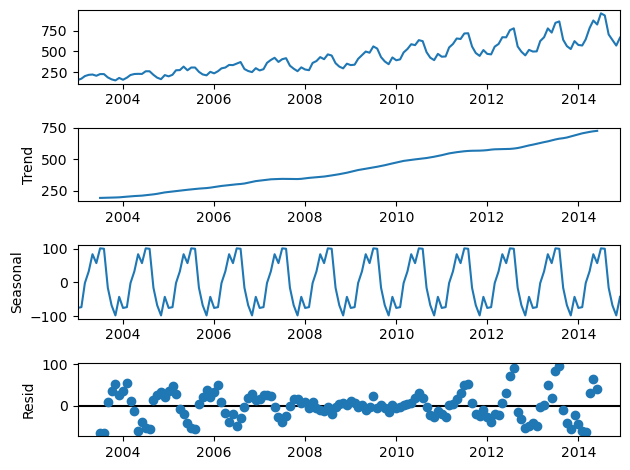

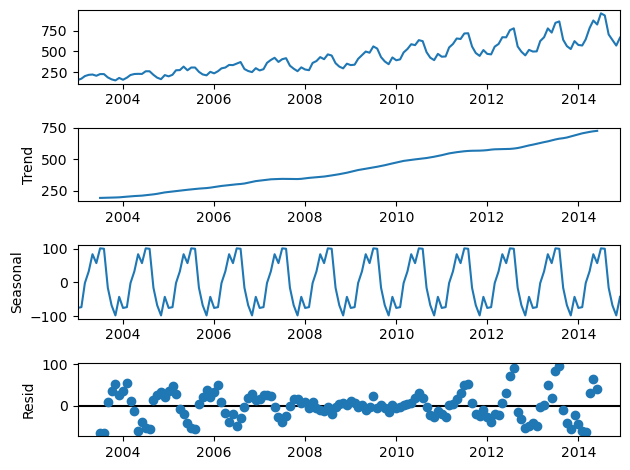

In [24]:
s.plot()

# Transformation

In [25]:
rm=df.rolling(window=12).mean()
rs=df.rolling(window=12).std()

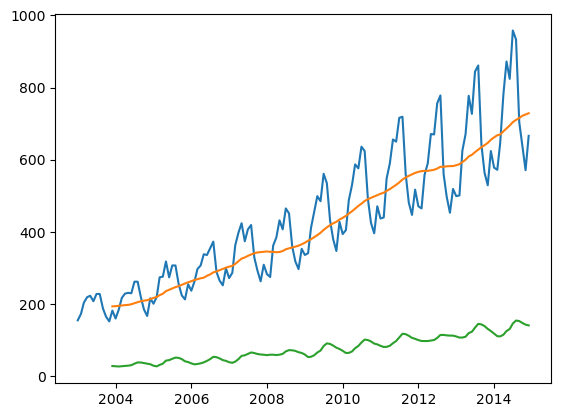

In [26]:
plt.plot(df)
plt.plot(rm)
plt.plot(rs)

In [27]:
# log-transformation

In [28]:
ldf=np.log(df)

In [29]:
lrm=ldf.rolling(window=12).mean()
lrs=ldf.rolling(window=12).std()

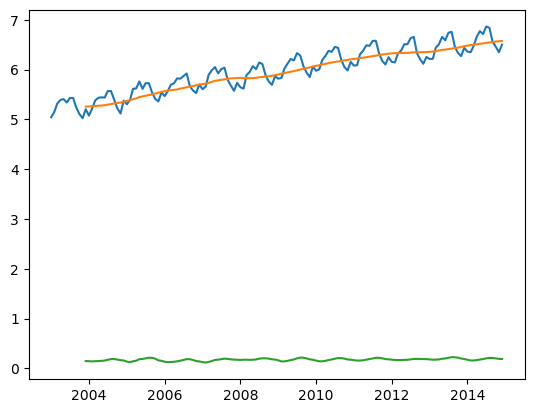

In [30]:
plt.plot(ldf)
plt.plot(lrm)
plt.plot(lrs)

In [31]:
q=ldf-lrm

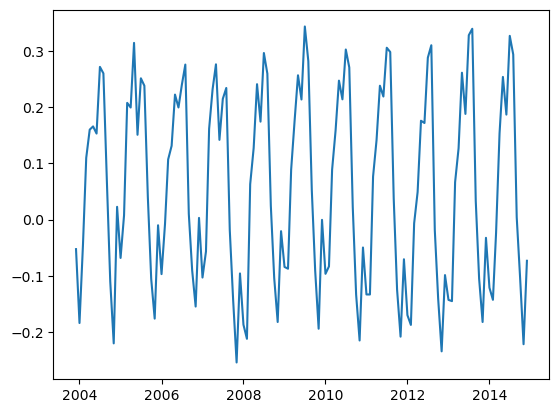

In [32]:
plt.plot(q)

# Removing null-values

In [33]:
Q=q[q.isna().Truks_sold==False]

In [34]:
Q.shape

(133, 1)

In [35]:
#133*0.8

106.4

In [36]:
tr=Q[:106]
ts=Q[106:]

# Model-Building

In [37]:
from statsmodels.tsa.ar_model import AutoReg

In [39]:
model=AutoReg(tr,lags=12).fit()

In [40]:
y_pred=model.predict(start='2012-10-01',end='2014-12-01')

# reversing-Transformation

In [ ]:
#q=ldf-lrm
# ldf=q+lrm
# df=np.exp(q+lrm)

In [41]:
pred=pd.DataFrame(round(np.exp(y_pred+lrm.tail(27).Truks_sold),0))

In [42]:
pred.head()

,0
2012-10-01,514.0
2012-11-01,479.0
2012-12-01,519.0
2013-01-01,490.0
2013-02-01,470.0


In [43]:
pred.columns=['Truks_sold']

In [44]:
pred.head()

,Truks_sold
2012-10-01,514.0
2012-11-01,479.0
2012-12-01,519.0
2013-01-01,490.0
2013-02-01,470.0


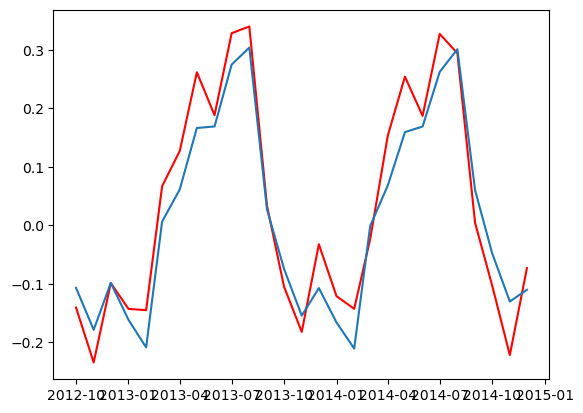

In [45]:
plt.plot(ts,c='red')
plt.plot(y_pred)